In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from rdkit import Chem

# PCA of 2D descriptor data

In [2]:
df_2D_desc = pd.read_csv (r'C:\documenten hier\2D_desc_ccr2.csv')
df_2D_desc.head()

,InChIKey,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,scaffold,smiles
0,AAMCCXZHVCUGJS-UHFFFAOYSA-N,13.717474,-5.012811,13.717474,0.004832,0.162680,727.775,692.495,727.241566,268,...,0,0,0,1,0,0,0,0,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,AANWVQVQZDEWDD-UHFFFAOYSA-N,12.265263,-0.608446,12.265263,0.123657,0.738889,360.369,344.241,360.111007,134,...,0,0,0,0,0,0,0,1,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,AAZMPANXGYITPF-UHFFFAOYSA-N,12.846593,-4.559210,12.846593,0.179124,0.578779,490.526,461.294,490.219175,188,...,0,0,0,0,0,0,0,0,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,ABHVKYFWPPHTHF-UHFFFAOYSA-N,14.455951,-4.513139,14.455951,0.027561,0.486918,625.689,583.353,625.308719,244,...,0,0,0,0,0,0,0,0,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,ABOSMIZKCHEJEN-UHFFFAOYSA-N,13.520089,-5.131106,13.520089,0.068672,0.387923,647.682,612.402,647.225247,242,...,1,0,0,0,0,0,0,0,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [3]:
features = list(df_2D_desc.columns.values)
features.remove('InChIKey')
features.remove('scaffold')
features.remove('smiles')

z = df_2D_desc.loc[ :,features].values # stores all values as numpy.ndarray
y = df_2D_desc.loc[:,['InChIKey']].values


In [4]:
x = StandardScaler().fit_transform(z)

In [5]:
pd.DataFrame(data = x, columns= features).head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.586775,-0.926815,0.586775,-0.824366,-1.907122,2.850287,2.962771,2.849568,2.508794,0.0,...,-0.212606,-0.280347,-0.266582,-0.024347,-0.059726,4.213796,0.0,-0.120096,-0.204302,-0.307705
1,-0.476874,1.330474,-0.476874,0.326799,1.330812,-1.682707,-1.603322,-1.678381,-1.596043,0.0,...,-0.212606,-0.280347,-0.266582,-0.024347,-0.059726,-0.231759,0.0,-0.120096,-0.204302,3.249868
2,-0.051088,-0.694339,-0.051088,0.864149,0.431093,-0.076852,-0.068595,-0.073711,0.058145,0.0,...,-0.212606,-0.280347,-0.266582,-0.024347,-0.059726,-0.231759,0.0,-0.120096,-0.204302,-0.307705
3,1.127661,-0.670728,1.127661,-0.604163,-0.085110,1.590767,1.531768,1.592395,1.773599,0.0,...,-0.212606,-0.280347,-0.266582,-0.024347,-0.059726,-0.231759,0.0,-0.120096,-0.204302,-0.307705
4,0.442204,-0.987443,0.442204,-0.205891,-0.641400,1.862113,1.912641,1.862699,1.712333,0.0,...,-0.212606,-0.280347,3.751190,-0.024347,-0.059726,-0.231759,0.0,-0.120096,-0.204302,-0.307705


In [6]:
pca = PCA(n_components=2) # set the amount of dimensions to 2

In [7]:
principalComponents = pca.fit_transform(x)

In [8]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components

In [9]:
principalDf.head()

,principal component 1,principal component 2
0,-12.587565,6.110897
1,9.388117,3.541679
2,-0.673388,1.848873
3,-11.975406,-7.319446
4,-9.195806,3.238824


In [10]:
finalDf = pd.concat([principalDf, df_2D_desc[['InChIKey']], df_2D_desc[['scaffold']], df_2D_desc[['smiles']]], axis = 1)
finalDf['scaffold'] = df_2D_desc['scaffold'].astype(str)
finalDf['smiles'] = df_2D_desc['smiles'].astype(str)
finalDf.head(5)

,principal component 1,principal component 2,InChIKey,scaffold,smiles
0,-12.587565,6.110897,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,9.388117,3.541679,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,-0.673388,1.848873,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,-11.975406,-7.319446,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,-9.195806,3.238824,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [11]:
pca.explained_variance_ratio_

array([0.189507  , 0.10667752])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

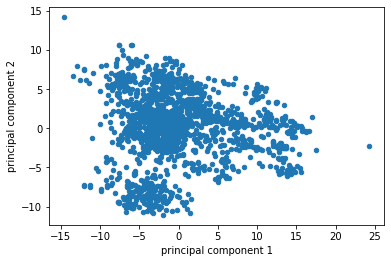

In [12]:
finalDf.plot.scatter(x= 'principal component 1', y='principal component 2')

In [47]:
import plotly.express as px
import molplotly
fig_2D = px.scatter(finalDf, x="principal component 1", y="principal component 2", color = "scaffold", title = 'PCA on 2D descriptor data after scaling',
                                      width=1200,
                                      height=800)

app_scatter = molplotly.add_molecules(fig=fig_2D,
                                      df=finalDf,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold'
                                     )
fig_2D.show()

# PCA on morgan fingerprint data

In [14]:
df_morgan = pd.read_csv (r'C:\documenten hier\MorganFp_scaffold_ccr2.csv')
df_morgan.head()

,InChIKey,0,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,scaffold
0,AAMCCXZHVCUGJS-UHFFFAOYSA-N,0,1,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...
1,AANWVQVQZDEWDD-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1
2,AAZMPANXGYITPF-UHFFFAOYSA-N,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1
3,ABHVKYFWPPHTHF-UHFFFAOYSA-N,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...
4,ABOSMIZKCHEJEN-UHFFFAOYSA-N,0,1,1,0,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...


In [15]:
df_morgan.dtypes

InChIKey    object
0            int64
1            int64
2            int64
3            int64
             ...  
508          int64
509          int64
510          int64
511          int64
scaffold    object
Length: 514, dtype: object

In [16]:
type(df_morgan['InChIKey'])

pandas.core.series.Series

In [17]:
featuresM = list(df_morgan.columns.values)
featuresM.remove('InChIKey')
featuresM.remove ('scaffold')
a = df_morgan.loc[ :,featuresM].values # stores all values as numpy.ndarray
b = df_morgan.loc[:,['InChIKey']].values


In [18]:
c = StandardScaler().fit_transform(a)

In [19]:
pd.DataFrame(data = c, columns= featuresM).head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.417935,1.110317,2.168572,2.020974,-0.651516,-0.622107,-0.428638,-0.407119,-0.441159,-0.443074,...,2.468286,-0.280347,-0.290062,2.020974,-0.304231,0.524332,-0.277881,-0.349772,-0.385097,-0.563667
1,-0.417935,-0.900644,-0.461133,-0.494811,-0.651516,-0.622107,-0.428638,-0.407119,2.266756,-0.443074,...,-0.405139,-0.280347,-0.290062,-0.494811,3.286974,-1.907187,-0.277881,-0.349772,-0.385097,-0.563667
2,-0.417935,-0.900644,-0.461133,2.020974,-0.651516,1.607440,-0.428638,-0.407119,-0.441159,-0.443074,...,-0.405139,-0.280347,-0.290062,2.020974,-0.304231,0.524332,-0.277881,-0.349772,-0.385097,-0.563667
3,2.392718,-0.900644,-0.461133,-0.494811,-0.651516,-0.622107,-0.428638,-0.407119,-0.441159,-0.443074,...,-0.405139,3.567012,-0.290062,-0.494811,-0.304231,0.524332,-0.277881,-0.349772,-0.385097,1.774097
4,-0.417935,1.110317,2.168572,-0.494811,-0.651516,1.607440,-0.428638,-0.407119,2.266756,-0.443074,...,-0.405139,3.567012,-0.290062,-0.494811,3.286974,0.524332,-0.277881,-0.349772,2.596752,-0.563667


In [20]:
pca_M = PCA(n_components=2) # set the amount of dimensions to 2

In [21]:
principalComponents_M = pca_M.fit_transform(c)

In [22]:
principalDf_M = pd.DataFrame(data = principalComponents_M
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components

In [23]:
principalDf_M.head()

,principal component 1,principal component 2
0,1.031900,0.143311
1,-0.650857,-0.845643
2,-6.831581,1.681085
3,9.477170,11.303856
4,0.256362,-0.186782


In [24]:
pca_M.explained_variance_ratio_

array([0.04430551, 0.03942489])

In [25]:
df = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')

In [26]:
finalDf_M = pd.concat([principalDf_M, df_morgan[['InChIKey']],df_morgan[['scaffold']], df[['SMILES']]], axis = 1)
finalDf_M['scaffold'] = finalDf_M['scaffold'].astype(str)
finalDf_M.head(5)


,principal component 1,principal component 2,InChIKey,scaffold,SMILES
0,1.031900,0.143311,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,-0.650857,-0.845643,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,-6.831581,1.681085,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,9.477170,11.303856,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,0.256362,-0.186782,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

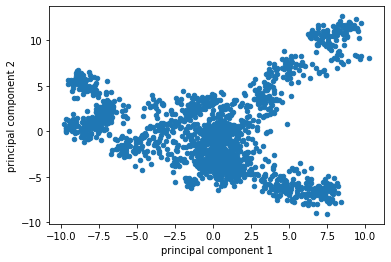

In [27]:
finalDf_M.plot.scatter(x= 'principal component 1', y='principal component 2')

In [43]:
import plotly.express as px
import molplotly
fig_m = px.scatter(finalDf_M, x="principal component 1", y="principal component 2", 
                   color = "scaffold", 
                   title = 'PCA on morgan fingerprints after scaling',
                   width=1200,
                   height=800)
fig_m.show()

PCA on data with morgan fingerprint without transforming

In [29]:
pd.DataFrame(data = a, columns= featuresM).head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0,1,1,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0


In [30]:
pca_M2 = PCA(n_components=2) # set the amount of dimensions to 2

In [31]:
principalComponents_M2 = pca_M2.fit_transform(a)

In [32]:
principalDf_M2 = pd.DataFrame(data = principalComponents_M2
             , columns = ['principal component 1', 'principal component 2']) # create new dataframe containing the two principle components

In [33]:
principalDf_M2.head()

,principal component 1,principal component 2
0,-0.290003,-0.003373
1,0.166318,-0.749022
2,3.559913,0.096160
3,-2.351472,5.404336
4,-0.317218,-0.055845


In [34]:
pca_M2.explained_variance_ratio_

array([0.06094573, 0.04980352])

In [35]:
finalDf_M2 = pd.concat([principalDf_M2, df_morgan[['InChIKey']], df_morgan[['scaffold']], df[['SMILES']]], axis = 1)
finalDf_M2['scaffold'] = finalDf_M2['scaffold'].astype(str)
finalDf_M2.head(5)

,principal component 1,principal component 2,InChIKey,scaffold,SMILES
0,-0.290003,-0.003373,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,0.166318,-0.749022,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,3.559913,0.096160,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,-2.351472,5.404336,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,-0.317218,-0.055845,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

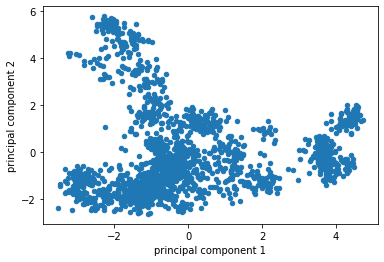

In [36]:
finalDf_M2.plot.scatter(x= 'principal component 1', y='principal component 2')

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

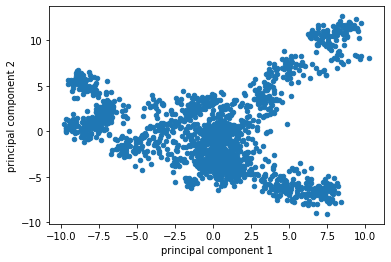

In [37]:
finalDf_M.plot.scatter(x= 'principal component 1', y='principal component 2')

In [38]:
pd.isna(finalDf_M2["scaffold"])

0       False
1       False
2       False
3       False
4       False
        ...  
1683    False
1684    False
1685    False
1686    False
1687    False
Name: scaffold, Length: 1688, dtype: bool

In [44]:
import plotly.express as px
import molplotly
fig = px.scatter(finalDf_M2, x="principal component 1", y="principal component 2", color = "scaffold", title = 'PCA on morgan fingerprint without scaling',width=1200,
                         height=800)
fig.show()
fig_m.show()
# add molecules to the plotly graph - returns a Dash app
#app = molplotly.add_molecules(fig=fig,
                           # df=finalDf_M2,
                           # smiles_col='SMILES',
                            #title_col='InChIKey',
                            #)
                         